###### 11월 14일


# 모듈 불러오기

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

# 시각화를 주피터에 
%matplotlib inline

#한글 폰트를 선명하게 보기위해
%config Inlinebackend.fiure_format = 'retina'
mpl.rc('font',family = 'malgun gothic')
# 유니코드에서 음수로 부호설정
mpl.rc('axes',unicode_minus = False)

# 차트 설정 
sns.set(font = "malgun gothic", rc = {'axes.unicode_minus':False}, style = 'darkgrid')
plt.rc('figure', figsize = (10,8))
warnings.filterwarnings('ignore')

# 데이터셋 로딩

In [ ]:
# 모기지수 : 일 평균 모기 개체수

In [2]:
mos = pd.read_csv('C:\\k_disital\\source\\mygit\\ML-First-Project\\mosquito_Indicator.csv')

In [ ]:
mos

In [ ]:
mos.info()

## 데이터 탐색 EDA

In [ ]:
mos.keys()

In [ ]:
#mos.columns !! 나중에 보고 삭제

In [ ]:
#colums=mos.keys() !! 나중에 보고 필요없으면 삭제

In [ ]:
# !!이거 만들필요가 있나??!!
#df = pd.DataFrame(mos , columns=colums)

In [ ]:
#df.columns = ['date','mosquito_Indicator','rain','mean_T','min_T','max_T'] !! 나중에 보고 삭제

In [ ]:
mos['mosquito_Indicator'].describe()

### 상관계수

In [3]:
mos.corr()

,mosquito_Indicator,rain(mm),mean_T(℃),min_T(℃),max_T(℃)
mosquito_Indicator,1.000000,0.216325,0.730742,0.746279,0.700929
rain(mm),0.216325,1.000000,0.147173,0.189054,0.100173
mean_T(℃),0.730742,0.147173,1.000000,0.990174,0.989618
min_T(℃),0.746279,0.189054,0.990174,1.000000,0.964941
max_T(℃),0.700929,0.100173,0.989618,0.964941,1.000000


<AxesSubplot:>

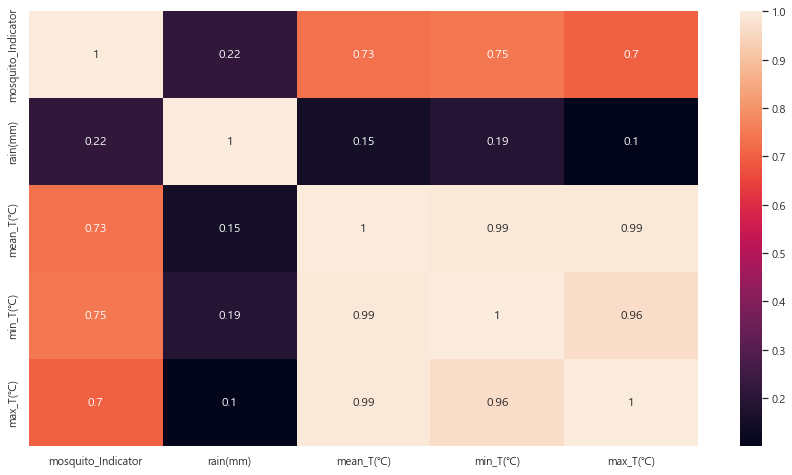

In [4]:
plt.figure(figsize = (15,8))
sns.heatmap(mos.corr(), annot=True)



## 데이터 전처리

### 중복된 데이터 제거

In [5]:
mos.date.is_unique

False

In [6]:
print(mos.date.count())
print(mos.date.nunique())

1342
1295


- https://min23th.tistory.com/45
- https://wikidocs.net/154060

In [7]:
mos.drop_duplicates(subset='date',ignore_index=True,inplace=True) ### 중복된거 지우는거임

#ignore_index=True : 인데스도 같이 수정해줌


In [8]:
mos.date.is_unique  ## True란것은 중복이 없다는 것임

True

In [9]:
print(mos.date.count())
print(mos.date.nunique())

1295
1295


In [10]:
mos

,date,mosquito_Indicator,rain(mm),mean_T(℃),min_T(℃),max_T(℃)
0,2016-05-01,254.4,0.0,18.8,12.2,26.0
1,2016-05-02,273.5,16.5,21.1,16.5,28.4
2,2016-05-03,304.0,27.0,12.9,8.9,17.6
3,2016-05-04,256.2,0.0,15.7,10.2,20.6
4,2016-05-05,243.8,7.5,18.9,10.2,26.9
...,...,...,...,...,...,...
1290,2019-12-27,5.5,0.0,-1.7,-4.6,2.6
1291,2019-12-28,5.5,0.0,1.1,-3.6,6.1
1292,2019-12-29,5.5,1.4,3.8,1.1,6.2
1293,2019-12-30,5.5,0.4,2.7,-5.7,6.8


### 데이터 시각화

In [ ]:
def plot_hist(df):
    # 하나의 도화지에 20개의 그래프 그리기
    plt.rcParams['figure.figsize'] = [20,16]
    fig = plt.figure()
    
    for i in range(len(df.columns)):
        ax = fig.add_subplot(3,2,i+1) # 5행5열에서 i+1번째 #ax : 축
        plt.hist(df[df.columns[i]],bins = 50)
        ax.set_title(df.columns[i])
    plt.show()

In [ ]:
plot_hist(mos)

### 날짜로 데이터타입 변경

In [11]:
mos['date'] = pd.to_datetime(mos['date'])

In [ ]:
mos.info()

### 스케일링

In [39]:
data = mos.drop(['mosquito_Indicator', 'date'],axis = 1)
target = mos['mosquito_Indicator']
# !! rain(mm) 넣고 뺴고 해서 값 얼마나 다른지 확인

In [ ]:
## rain 뺏을 떄
#MAE: 152.595, MSE:  39182.144, RMSE:  197.945, R2:0.544
# lr.score(X_train,y_train
# 0.5611723963842761

# lr.score(X_test, y_test)
# 0.5442378010778453


##넣었을 떄 
# MAE: 152.494, MSE:  39084.151, RMSE:  197.697, R2:0.545
                
# 0.561818520440136
# 0.5453776460188773    

## 진짜 얼마 차이 안남.. 근데 다중공산성 검사를 해야한...?

In [40]:
data

,mean_T(℃),rain(mm)
0,18.8,0.0
1,21.1,16.5
2,12.9,27.0
3,15.7,0.0
4,18.9,7.5
...,...,...
1290,-1.7,0.0
1291,1.1,0.0
1292,3.8,1.4
1293,2.7,0.4


In [ ]:
target

In [41]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
scaled = sc.fit_transform(data)

In [24]:
scaled.shape

(1295, 4)

In [ ]:
# # '월' 만 분리 !! 나중에 다시 확인
# mos['date_m'] = mos['date'].dt.strftime('%m')
# mos.head()

### train, test 나누기

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled, target, test_size = 0.2, random_state = 1121)

# 회귀분석

## LinearRegression 알고리즘

In [17]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [43]:
lr.fit(X_train, y_train)
pred = lr.predict(X_test)         

In [ ]:
## !! 책323 metrics.mean_absolute, metrics.mean_squared_error, metrics.r2_score
## !! 어떤게 낮은게 좋은건지 찾아보기

In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)

print('MAE: {0:.3f}, MSE: {1: .3f}, RMSE: {2: .3f}, R2:{3:.3f}'.format(mae, mse, rmse, r2))

MAE: 155.773, MSE:  40164.192, RMSE:  200.410, R2:0.533


In [45]:
print(lr.score(X_train,y_train))
print(lr.score(X_test, y_test))

0.5373456653330635
0.5328147344485923


## 다항회귀

### 사이킷런 변환기_3차

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3 , include_bias = False) # 절편 개수(1을 제거)

#poly.fit(X_train)
train_poly = poly.fit_transform(X_train)
test_poly = poly.transform(X_test)

poly.get_feature_names()

In [ ]:
lr.fit(train_poly,y_train)
pred = lr.predict(test_poly)
print(lr.score(train_poly, y_train))
print(lr.score(test_poly, y_test))

In [ ]:
print(X_train.shape)
y_train = np.array(y_train).reshape(-1,1) # 2차원으로 차원 변경
print(y_train.shape)

### 사이킷런 변환기_2차

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree= 2, include_bias = False) # 절편 개수(1을 제거)

#poly.fit(X_train)
train_poly = poly.fit_transform(X_train)
test_poly = poly.transform(X_test)

poly.get_feature_names()

### 다중회귀_2차

In [ ]:
lr.fit(train_poly,y_train)
pred = lr.predict(test_poly)
print(lr.score(train_poly, y_train))
print(lr.score(test_poly, y_test))

### 릿지 규제
- 릿지 회귀(Ridge Regression) 모델 : 계수를 제곱한 값을 기준으로 규제 적용

In [ ]:
from sklearn.linear_model import Ridge, Lasso
# 훈련세트와 테스트세트의 정수가 가장 가까운 지점이 최적의 alpha 값이 된다
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    #릿지모델
    ridge = Ridge(alpha = alpha)
    #릿지모델 훈련
    ridge.fit(X_train, y_train)
    train_score.append(ridge.score(X_train, y_train))
    test_score.append(ridge.score(X_test,y_test))

In [ ]:
# print(train_score)
# print(test_score)
# !!나중에 삭제하기

In [ ]:
# 시각화
plt.figure(figsize=(10,10))
plt.plot(np.log10(alpha_list), train_score) # 로그로 안 보면 크기가 너무 크다.
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('score')
plt.show()

- 확률일 높은 것 중에 폭이 좁은게 -1(0.1)과 0(1)/ 점수는 낮지만 폭이 좁은건 1(10)

In [ ]:
# alpha가 10(1)
ridge = Ridge(alpha = 10)
ridge.fit(X_train,y_train)
print(ridge.score(X_train,y_train))
print(ridge.score(X_test,y_test))

In [ ]:
# alpha가 1
ridge = Ridge(alpha = 1)
ridge.fit(X_train,y_train)
print(ridge.score(X_train,y_train))
print(ridge.score(X_test,y_test))

In [ ]:
# alpha가 -1
ridge = Ridge(alpha = 0.1)
ridge.fit(X_train,y_train)
print(ridge.score(X_train,y_train))
print(ridge.score(X_test,y_test))

- 알파값이 0.1(-1)일때가 예측값이 높고, 과대적합이 가장 최소화 되는 구간? !!

### 라쏘규제

In [ ]:
lasso = Lasso()

lasso.fit(X_train, y_train)
print(lasso.score(X_train,y_train))
print(lasso.score(X_test,y_test))

In [ ]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    #라쏘모델
    lasso = Lasso(alpha = alpha)
    #릿지모델 훈련
    lasso.fit(X_train, y_train)
    #결정계수(R2 score)
    train_score.append(lasso.score(X_train,y_train))
    test_score.append(lasso.score(X_test,y_test))

In [ ]:
# 시각화
plt.figure(figsize=(10,10))
plt.plot(np.log10(alpha_list), train_score) # 로그로 안 보면 크기가 너무 크다.
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('score')
plt.show()

- 시각화로 봤을 때 -1(0.1), 0(1), 1(10) 넣어보기

In [ ]:
# 알파값 0.1
lasso = Lasso(alpha = 0.1)
lasso.fit(X_train,y_train)
print(lasso.score(X_train,y_train))
print(lasso.score(X_test,y_test))

In [ ]:
# 알파값 1
lasso = Lasso(alpha = 1)
lasso.fit(X_train,y_train)
print(lasso.score(X_train,y_train))
print(lasso.score(X_test,y_test))

In [ ]:
# 알파값 10
lasso = Lasso(alpha = 10)
lasso.fit(X_train,y_train)
print(lasso.score(X_train,y_train))
print(lasso.score(X_test,y_test))

- 릿지가 미세하게 좋은 결과값이 나옴<br> !! 이거 다시얘기해보기

릿지 alpha : -1 <br>
0.5617292087395449<br>
0.5456175742772317<br>
<br>
라쏘 alpha : 0.1<br>
0.5614372438900941<br>
0.5437997463207276<br>

# 시계열 분석

## 전처리 및 시각화

### 모듈 불러오기

In [ ]:
import warnings

import numpy as np
import pandas as pd

# hide warnings
warnings.filterwarnings("ignore")

In [ ]:
#_centered 이게 미리 설치 되어 있어서 충돌이 일어나 모듈 import가 안되서 함수로 따로 만듬
import  scipy.signal.signaltools

def _centered(arr, newsize):
    # Return the center newsize portion of the array.
    newsize = np.asarray(newsize)
    currsize = np.array(arr.shape)
    startind = (currsize - newsize) // 2
    endind = startind + newsize
    myslice = [slice(startind[k], endind[k]) for k in range(len(endind))]
    return arr[tuple(myslice)]

scipy.signal.signaltools._centered = _centered

In [ ]:
# 스케일링 후 date, Indi 를 합친 df
mos_scaled = pd.DataFrame(scaled, columns=data.columns)
mos_scaled['date'] = mos.date
mos_scaled['Indi'] = target
mos_scaled

In [ ]:
mos_scaled.date

In [ ]:
len(mos_scaled.date)

In [ ]:
# 일별 
mos_p = mos_scaled[['date', 'Indi']]
mos_p = mos_p.set_index('date')
## 시리즈가 아니라서 예측이 제대로 안된거가 해서 바꿔봤음(승객은 시리즈라서)
## 근데 바꿔도 예측값이 5.5 밖에 안나옴 !! 데이터 프레임이나 시리즈나 상관 없음 , 나중에 삭제하기
#mos_p = mos_p.Indi

In [ ]:

type(mos_p)

In [ ]:
mos_p.index

## 일

### 예측

In [ ]:
mos_p.index= mos_p.index.to_period(freq = 'D')

#### 모기 데이터 시계열 시각화 ( 일)

In [ ]:
# 시계열 데이터 그래프
# 인덱스가 데이터 타입인 시리즈를 가지고 그레프 그리기
from sktime.utils.plotting import plot_series
plot_series(mos_p)

#### 기간(범위) 지정

In [ ]:
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.naive import NaiveForecaster

# step 1: data specification : 데이터 세팅
y = mos_p

# step 2: specifying forecasting horizon : 기간 설정 ( 2년)
fh = np.arange(1, 732)
# fh = ForecastingHorizon(
#     pd.PeriodIndex(pd.date_range("2020-01-01", periods=731, freq="D")), is_relative=False
# )

# step 3: specifying the forecasting algorithm :알고리즘 인스턴트 생성
forecaster = NaiveForecaster(strategy="mean", sp=731)
##ValueError: Unknown strategy: first. Expected one of: ('last', 'mean', 'drift').

# step 4: fitting the forecaster : 학습
forecaster.fit(y, fh=fh)

# step 5: querying predictions : 에측
y_pred = forecaster.predict(fh)

In [ ]:
y_pred

In [ ]:
# 시각화
plot_series(y, y_pred, labels=["y", "y_pred"])

#### 데이터 분할

In [ ]:
from sktime.forecasting.model_selection import temporal_train_test_split
y_train, y_test = temporal_train_test_split(y, test_size=0.25)

In [ ]:
# 데이터 학습

# we can simply take the indices from `y_test` where they already are stored
fh = ForecastingHorizon(y_test.index, is_relative=False)

# step 3: specifying the forecasting algorithm :알고리즘 인스턴트 생성
forecaster = NaiveForecaster(strategy="mean", sp=731)

# step 4: fitting the forecaster : 학습
forecaster.fit(y_train)

# step 5: querying predictions : 에측
y_pred = forecaster.predict(fh)

In [ ]:
y_pred.shape

In [ ]:
# 시각화
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])

In [ ]:
plot_series( y_test, y_pred, labels=[ "y_test", "y_pred"])

#### 평가

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('MAE: {0:.3f}, MSE: {1: .3f}, RMSE: {2: .3f}, R2:{3:.3f}'.format(mae, mse, rmse, r2))

- MAPE는 퍼센트 값을 가지며 0에 가까울수록 회귀 모형의 성능이 좋다고 해석할 수 있음
- 0~100% 사이의 값을 가져 이해하기 쉬우므로 성능 비교 해석이 가능
- https://acdongpgm.tistory.com/102

In [ ]:
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error

In [ ]:
mean_absolute_percentage_error(y_test, y_pred, symmetric=False)

In [ ]:
mean_absolute_percentage_error(y_test, y_pred, symmetric=True)
#이와 같은 숫자를 적절하게 해석하려면 해당 메트릭의 속성을 이해하고(예: 낮을수록 좋음) 적합한 기준선 및 경쟁자 알고리즘과 비교하는 것이 좋습니다(5단계 참조).
## symmetric: 번역은 대칭인데... 이게 뭘 의미하는지는 아직 잘 모르ㅔㅆ음!!

In [ ]:
from sktime.performance_metrics.forecasting import MeanAbsolutePercentageError

In [ ]:
# option 2: using the composable class interface
mape = MeanAbsolutePercentageError(symmetric=False)
# the class interface allows to easily construct variants of the MAPE
#  e.g., the non-symmetric verion
# it also allows for inspection of metric properties
#  e.g., are higher values better (answer: no)?
mape.get_tag("lower_is_better")

In [ ]:
mape(y_test, y_pred)

#### 계절성 평가

In [ ]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing

In [ ]:
forecaster = ExponentialSmoothing(trend="additive", seasonal="add", sp=31)
#trend must be one of: 'add', 'mul', 'additive'(첨가물), 'multiplicative'
#seasonal must be one of: 'add', 'mul', 'additive', 'multiplicative'
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
mean_absolute_percentage_error(y_test, y_pred, symmetric=False)

In [ ]:
from sktime.forecasting.ets import AutoETS

In [ ]:
forecaster = AutoETS(auto=True, sp=31, n_jobs=-1)

forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
mean_absolute_percentage_error(y_test, y_pred, symmetric=False)

In [ ]:
!pip install sktime[all_extras]
##!! 아직 안갖고 왔음

In [ ]:
from sktime.forecasting.arima import ARIMA

In [ ]:
forecaster = ARIMA(
    order=(1, 1, 0), seasonal_order=(0, 1, 0, 12), suppress_warnings=True
)

forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
mean_absolute_percentage_error(y_test, y_pred, symmetric=False)

!! 다변량 예측은 여러개의 컬럼을 가지고 하나의 타겟을 예측하는게 아니고, 여러가지 컬럼을 동시에 예측하는 건가?

In [ ]:
from sktime.forecasting.arima import ARIMA
from sktime.forecasting.compose import TransformedTargetForecaster
from sktime.transformations.series.detrend import Deseasonalizer

In [ ]:
forecaster = TransformedTargetForecaster(
    [
        ("deseasonalize", Deseasonalizer(model="multiplicative", sp=31)),
        ("forecast", ARIMA()),
    ]
)

forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
mean_absolute_percentage_error(y_test, y_pred, symmetric=False)

In [ ]:
from sktime.forecasting.compose import MultiplexForecaster
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.model_selection import (
    ForecastingGridSearchCV,
    SlidingWindowSplitter,
)

In [ ]:
forecaster = MultiplexForecaster(
    forecasters=[
        ("naive", NaiveForecaster(strategy="mean")),
        ("ets", ExponentialSmoothing(trend="add", sp=31)),
    ]
)
cv = SlidingWindowSplitter(initial_window=int(len(y_train) * 0.5), window_length=30)
forecaster_param_grid = {"selected_forecaster": ["ets", "naive"]}
gscv = ForecastingGridSearchCV(forecaster, cv=cv, param_grid=forecaster_param_grid)

In [ ]:
gscv.fit(y_train)
y_pred = gscv.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
mean_absolute_percentage_error(y_test, y_pred, symmetric=False)

In [ ]:
from sktime.forecasting.compose import EnsembleForecaster


In [ ]:
ses = ExponentialSmoothing(sp=31)
holt = ExponentialSmoothing(trend="add", damped_trend=False, sp=31)
damped = ExponentialSmoothing(trend="add", damped_trend=False, sp=31)

forecaster = EnsembleForecaster(
    [
        ("ses", ses),
        ("holt", holt),
        ("damped", damped),
    ]
)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
mean_absolute_percentage_error(y_test, y_pred, symmetric=False)

In [ ]:
from sktime.forecasting.all import mean_squared_error
from sktime.forecasting.online_learning import (
    NormalHedgeEnsemble,
    OnlineEnsembleForecaster,
)

In [ ]:
hedge_expert = NormalHedgeEnsemble(n_estimators=3, loss_func=mean_squared_error)


In [ ]:
forecaster = OnlineEnsembleForecaster(
    [
        ("ses", ses),
        ("holt", holt),
        ("damped", damped),
    ],
    ensemble_algorithm=hedge_expert,
)

forecaster.fit(y=y_train, fh=fh)
y_pred = forecaster.update_predict_single(y_test)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
mean_absolute_percentage_error(y_test, y_pred, symmetric=False)

### 모기 데이터 시계열 시각화 (월)

In [ ]:
에러용

In [ ]:
# 월별
mos_p_m = mos_scaled[['date', 'Indi']]
mos_p_m = mos_p_m.set_index('date')
## 시리즈가 아니라서 예측이 제대로 안된거가 해서 바꿔봤음(승객은 시리즈라서)
## 근데 바꿔도 예측값이 5.5 밖에 안나옴 !!
#mos_p_m = mos_p_m.Indi


In [ ]:
mos_p_m.index= mos_p_m.index.to_period(freq = 'M')

In [ ]:
mos_p_m

In [ ]:
mos_p_m =mos_p_m.groupby([mos_p_m.index])['Indi'].sum()
# 위의 거랑 똑같은 식 : mos_p_m =mos_p_m.groupby([mos_p_m.index]).sum('Indi')

In [ ]:
mos_p_m

In [ ]:
plot_series(mos_p_m)

In [ ]:

# step 1: data specification : 데이터 세팅
y = mos_p_m

# step 2: specifying forecasting horizon : 기간 설정
### 예측 범위(2020 1월 달 => 31일)
fh = np.arange(1, 32)

# step 3: specifying the forecasting algorithm
forecaster = NaiveForecaster(strategy="last", sp=31)

# step 4: fitting the forecaster
forecaster.fit(y)

# step 5: querying predictions
y_pred_m = forecaster.predict(fh)

In [ ]:
y_pred_m

In [ ]:
# 시각화
plot_series(y, y_pred_m, labels=["y", "y_pred_m"])

### 예측 알고리즘 지정 

In [ ]:
from sktime.forecasting.naive import NaiveForecaster
forecaster = NaiveForecaster(strategy="last")

### all estimator

In [ ]:
from sktime.registry import all_estimators

all_estimators(
    "forecaster", as_dataframe=True, return_tags=["scitype:y", "requires-fh-in-fit"]
)

In [ ]:
ㅁㄴㅇㄻㄴㅇㄹ!! 나중에 시간 많을 때 돌려보기

from sktime.registry import all_estimators

all_estimators(
    "forecaster", as_dataframe=True, return_tags=["scitype:y", "requires-fh-in-fit"]
)

## 분류

## 회귀